# Problem Statement:
Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

Price_range is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import Data & Library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Mobile_data.csv")
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [3]:
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
data.tail()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0
1999,510,2.0,5,45,0.9,168,6,16,483,754,3919,19,4,2,3


#  Data Pre-Processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [7]:
data.isna().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

# Outlier

<AxesSubplot:>

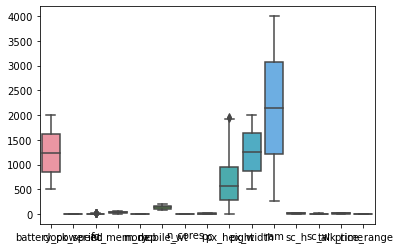

In [8]:
sns.boxplot(data=data)

In [9]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

# Data Partition

In [184]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = data.drop(['price_range'],axis=1)
train_y = data['price_range']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x, train_y, test_size=0.3,random_state=20)

# Scaling Data

In [185]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
X_train[0:5]

array([[-1.31349885, -0.88934791, -1.00511037, -0.39044678,  0.33314395,
         1.18632553, -1.10131692, -1.47860051, -1.2549148 ,  0.80719845,
         0.99373319, -1.49493194, -0.86296121, -1.65305696],
       [-0.76692651,  0.33372387, -0.30200185,  0.15776854, -0.36715865,
         0.76194498, -0.6651518 , -0.98031581, -1.34462423, -1.69806205,
        -0.67180877,  0.63754201,  1.44662719, -0.00301199],
       [-0.18860309,  1.55679565,  0.16673716, -0.77419751, -0.01700735,
        -1.64287818, -1.53748203, -0.48203112,  0.08848394, -1.20522392,
         0.14078494, -1.02104884, -1.09392005, -1.46971863],
       [-0.80321347,  1.3121813 , -0.53637135,  0.04812547, -0.36715865,
         1.61070609, -1.10131692,  1.17891786, -0.70544453,  0.98516778,
         1.20559453, -0.07328264, -1.09392005,  1.64703298],
       [ 0.54620784,  0.82295258, -0.30200185,  1.14455612,  0.68329525,
         0.79023701,  0.20717843,  0.18234847, -0.78618302, -1.36950329,
        -0.31962369, -1.49

In [187]:
X_train.mean(axis=0)

array([ 1.47183852e-16,  1.52259158e-17,  6.34413157e-17,  1.38302068e-16,
        2.48689958e-16, -7.16886867e-17, -1.77635684e-16, -7.29575130e-17,
       -2.03012210e-17,  2.38539347e-16, -1.31957937e-16,  1.77635684e-17,
        6.09036631e-17, -3.17206578e-18])

In [188]:
 X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Model building

In [189]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=378) #6any number
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=378)

# Prediction on train data set

In [190]:
data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [191]:
X_train=pd.DataFrame(X_train,columns=['battery_power', 'clock_speed', 'fc', 'int_memory','m_dep', 'mobile_wt', 'n_cores','pc' ,'px_height','px_width','ram','sc_h','sc_w','talk_time'])
X_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350


In [192]:
y_train.reset_index(drop=True, inplace=True)

In [193]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057,2
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012,0
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719,1
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033,3
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350,1


In [194]:
train['Predicted']=model.predict(X_train)
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,Predicted
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057,2,2
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012,0,0
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719,1,0
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033,3,2
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350,1,0


# Model Performance

In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['price_range'],train['Predicted'])
print(confusion_matrix)

[[343  24   0   0]
 [141 171  35   2]
 [  5  93 194  45]
 [  0   2  77 268]]


In [198]:
Accuracy_Train=((343+171+194+268)/(1400)*100)
print(Accuracy_Train)

69.71428571428572


In [199]:
from sklearn.metrics import classification_report
print(classification_report(train['price_range'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       367
           1       0.59      0.49      0.54       349
           2       0.63      0.58      0.60       337
           3       0.85      0.77      0.81       347

    accuracy                           0.70      1400
   macro avg       0.69      0.69      0.69      1400
weighted avg       0.69      0.70      0.69      1400



# Prediction test

In [200]:
X_test=pd.DataFrame(X_train,columns=['battery_power', 'clock_speed', 'fc', 'int_memory','m_dep', 'mobile_wt', 'n_cores','pc' ,'px_height','px_width','ram','sc_h','sc_w','talk_time'])
X_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350


In [201]:
y_test.reset_index(drop=True, inplace=True)

In [202]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057,3.0
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012,2.0
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719,2.0
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033,1.0
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350,3.0


In [203]:
test['Predicted']=model.predict(X_test)
test.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,Predicted
0,-1.313499,-0.889348,-1.005110,-0.390447,0.333144,1.186326,-1.101317,-1.478601,-1.254915,0.807198,0.993733,-1.494932,-0.862961,-1.653057,3.0,2
1,-0.766927,0.333724,-0.302002,0.157769,-0.367159,0.761945,-0.665152,-0.980316,-1.344624,-1.698062,-0.671809,0.637542,1.446627,-0.003012,2.0,0
2,-0.188603,1.556796,0.166737,-0.774198,-0.017007,-1.642878,-1.537482,-0.482031,0.088484,-1.205224,0.140785,-1.021049,-1.093920,-1.469719,2.0,0
3,-0.803213,1.312181,-0.536371,0.048125,-0.367159,1.610706,-1.101317,1.178918,-0.705445,0.985168,1.205595,-0.073283,-1.093920,1.647033,1.0,2
4,0.546208,0.822953,-0.302002,1.144556,0.683295,0.790237,0.207178,0.182348,-0.786183,-1.369503,-0.319624,-1.494932,-0.632002,-0.186350,3.0,0


In [204]:
#Replacing spaces with null values in total charges column
test['price_range'] =test["price_range"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

# Model Performance on test data

In [205]:
test=test.dropna()

In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['price_range'],test['Predicted'])
print(confusion_matrix)

[[57 26 30 20]
 [59 28 33 31]
 [61 34 32 36]
 [54 37 28 34]]


In [209]:
Accuracy_test=((57+28+32+34)/(600)*100)
Accuracy_test

25.166666666666664